In [31]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# 加载示例数据集（这里使用手写数字数据集）
digits = datasets.load_digits()
data = digits.data
labels = digits.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# 创建SVM分类器
svm_classifier = svm.SVC()
# 训练SVM模型
svm_classifier.fit(X_train, y_train)
# 在测试集上进行预测
svm_predictions = svm_classifier.predict(X_test)
# 计算准确率
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM分类器的准确率：", svm_accuracy)

SVM分类器的准确率： 0.9861111111111112


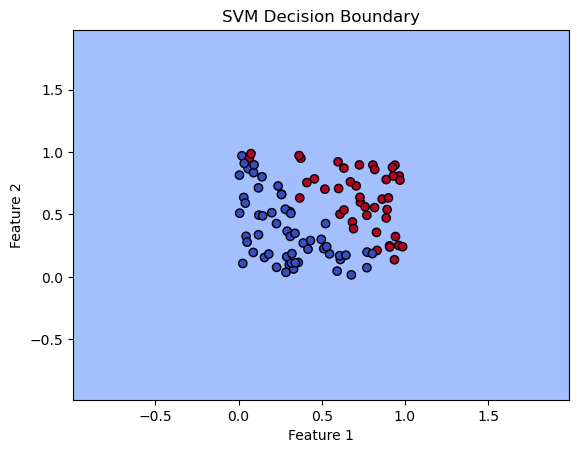

In [32]:
import svm
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

# Instantiate and train the SVM model
svm_model = svm.SVM(C=1.0, tol=0.01, max_passes=5)
svm_model.fit(X, y)

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(svm_model, X, y)


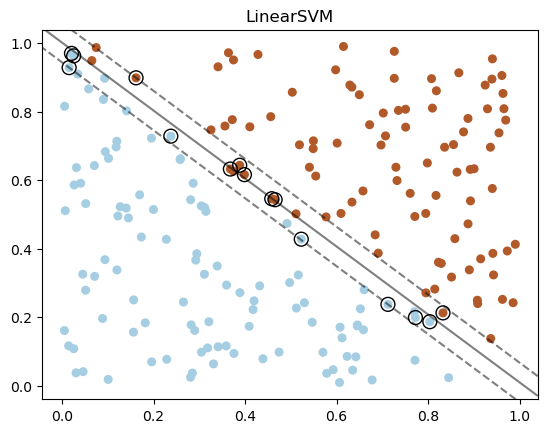

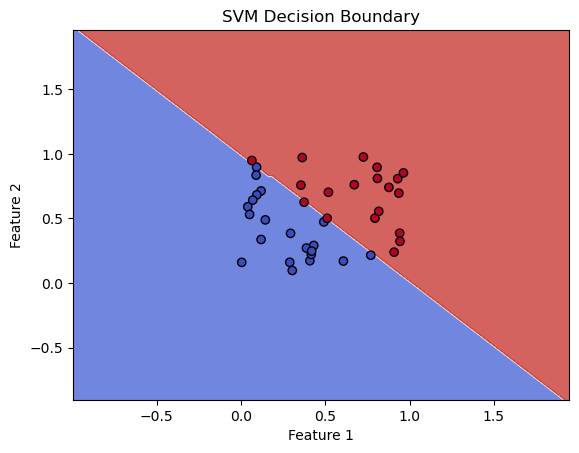

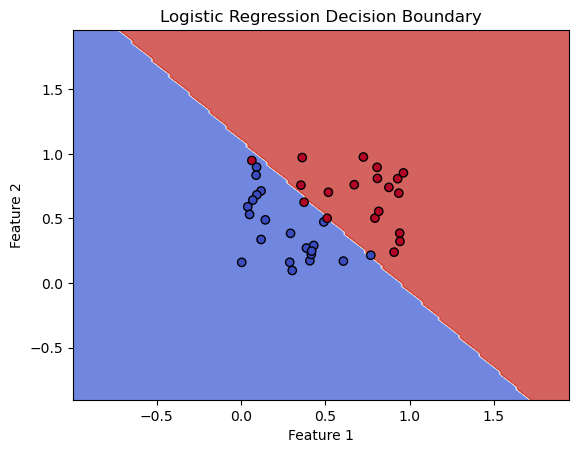

SVM Accuracy: 0.97
Logistic Regression Accuracy: 0.90


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(200, 2)
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', C=100)  # SVC 建模：使用 SVC类，线性核函数
svm_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制分割超平面和样本集分类结果
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)  # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = svm_model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')  # 绘制 支持向量
plt.title("LinearSVM")
plt.show()

# Plot decision boundaries for SVM and Logistic Regression
plot_decision_boundary(svm_model, X_test, y_test, 'SVM Decision Boundary')
plot_decision_boundary(lr_model, X_test, y_test, 'Logistic Regression Decision Boundary')

# Print accuracy
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')


e:\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


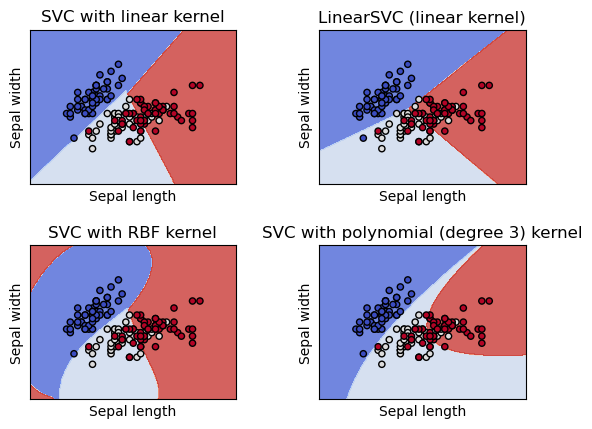

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """创建要绘制的点网格

    参数
    ----------
    x: 创建网格x轴所需要的数据
    y: 创建网格y轴所需要的数据
    h: 网格大小的可选大小，可选填

    返回
    -------
    xx, yy : n维数组
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """绘制分类器的决策边界。

    参数
    ----------
    ax: matplotlib子图对象
    clf: 一个分类器
    xx: 网状网格meshgrid的n维数组
    yy: 网状网格meshgrid的n维数组
    params: 传递给contourf的参数字典，可选填
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# 导入数据以便后续使用
iris = datasets.load_iris()
# 采用前两个特征。我们可以通过使用二维数据集来避免使用切片。
X = iris.data[:, :2]
y = iris.target

# 我们创建一个SVM实例并拟合数据。由于要绘制支持向量，因此我们不缩放数据
C = 1.0  # SVM正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# 为图像设置标题
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# 设置一个2x2结构的画布
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim

# 全连接神经网络
class SimpleFCNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleFCNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x

# 卷积神经网络
class SimpleCNN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, input_size, output_size):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size)
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# 定义输入和输出维度
input_size = 784  # 对于简单的全连接神经网络，假设输入是28x28的图像
output_size = 10  # 输出类别数量

# 创建全连接神经网络和卷积神经网络实例
fc_net = SimpleFCNN(input_size, output_size)
cnn_net = SimpleCNN(1, 16, 3, 576, output_size)  # 示例输入图像大小为24x24

# 打印网络结构
print("全连接神经网络结构：\n", fc_net)
print("\n卷积神经网络结构：\n", cnn_net)


全连接神经网络结构：
 SimpleFCNN(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

卷积神经网络结构：
 SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=576, out_features=10, bias=True)
)


## 使用PyTorch训练全连接神经网络

In [36]:
# 生成虚构的数据集
X, y = datasets.make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 转换NumPy数组为PyTorch张量
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# 全连接神经网络模型
class SimpleFCNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleFCNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x

# 创建全连接神经网络实例
input_size = X_train.shape[1]
output_size = 1
fc_net = SimpleFCNN(input_size, output_size)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(fc_net.parameters(), lr=0.001)

# 训练全连接神经网络
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = fc_net(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

# 在测试集上进行预测
with torch.no_grad():
    fc_predictions = torch.sigmoid(fc_net(X_test)).round().numpy().astype(int)

# 计算全连接神经网络的准确率
fc_accuracy = accuracy_score(y_test.numpy().astype(int), fc_predictions)
print("全连接神经网络的准确率：", fc_accuracy)


全连接神经网络的准确率： 0.455


## 使用MNIST数据集进行卷积神经网络的训练

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# 划分数据集
mnist_train, mnist_val = train_test_split(mnist_train, test_size=0.2, random_state=42)

# 创建数据加载器
batch_size = 64
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False)

# 卷积神经网络模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 14 * 14, 10)  # 输入大小根据图像大小调整

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = x.view(-1, 16 * 14 * 14)
        x = self.fc(x)
        return x

# 创建卷积神经网络实例
cnn_net = SimpleCNN()

# 定义损失函数和优化器
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_net.parameters(), lr=0.001)

# 训练卷积神经网络
num_epochs_cnn = 5
for epoch in range(num_epochs_cnn):
    for inputs, labels in train_loader:
        optimizer_cnn.zero_grad()
        outputs_cnn = cnn_net(inputs)
        loss_cnn = criterion_cnn(outputs_cnn, labels)
        loss_cnn.backward()
        optimizer_cnn.step()

# 在验证集上进行预测
cnn_net.eval()
with torch.no_grad():
    all_preds = []
    all_labels = []
    for inputs, labels in val_loader:
        outputs_cnn = cnn_net(inputs)
        preds = torch.argmax(outputs_cnn, dim=1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# 计算卷积神经网络的准确率
cnn_accuracy = accuracy_score(all_labels, all_preds)
print("卷积神经网络在MNIST验证集上的准确率：", cnn_accuracy)


卷积神经网络在MNIST验证集上的准确率： 0.9785833333333334
